In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the stock symbols in the portfolio
symbols = ['META', 'AAPL', 'GOOG', 'AMZN']  # Replace with your stock symbols

# Define the time period to pull data for
start_date = '2024-01-01'
end_date = '2025-01-01'

In [3]:
# Function to fetch stock data and calculate daily returns
def get_stock_data(symbols, start_date, end_date):
    stock_data = yf.download(symbols, start=start_date, end=end_date)['Close']
    returns = stock_data.pct_change().dropna()  # Calculate daily returns
    return returns

In [4]:
# Function to calculate portfolio performance metrics
def portfolio_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(weights * mean_returns) * 252  # Annualize return
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)  # Annualize volatility
    return portfolio_return, portfolio_volatility

In [5]:
# Generate random portfolios to plot the efficient frontier utilizing montecarlo simulation
def generate_efficient_frontier(mean_returns, cov_matrix, num_portfolios=10000):
    results = np.zeros((3, num_portfolios))  # To store returns, volatility, and Sharpe ratios
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)  # Normalize the weights to sum to 1
        portfolio_return, portfolio_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_return
        results[1,i] = portfolio_volatility
        results[2,i] = portfolio_return / portfolio_volatility  # Sharpe ratio
    return results

In [6]:
# Main script
def main():
    # Fetch stock data and compute returns
    returns = get_stock_data(symbols, start_date, end_date)
    
    # Calculate expected returns and covariance matrix
    mean_returns = returns.mean()  # Mean daily returns
    cov_matrix = returns.cov()  # Covariance matrix of returns
    
    # Generate efficient frontier
    results = generate_efficient_frontier(mean_returns, cov_matrix)
    
    # Plot the efficient frontier
    plt.figure(figsize=(10, 6))
    plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
    plt.title('Efficient Frontier - Modern Portfolio Theory', fontsize=14)
    plt.xlabel('Risk (Volatility)', fontsize=12)
    plt.ylabel('Return', fontsize=12)
    plt.colorbar(label='Sharpe Ratio')
    
    # Mark the maximum Sharpe ratio portfolio
    max_sharpe_idx = np.argmax(results[2,:])
    plt.scatter(results[1,max_sharpe_idx], results[0,max_sharpe_idx], marker='*', color='red', s=200, label='Max Sharpe Ratio')

    # Mark the minimum volatility portfolio
    min_volatility_idx = np.argmin(results[1,:])
    plt.scatter(results[1,min_volatility_idx], results[0,min_volatility_idx], marker='*', color='yellow', s=200, label='Min Volatility')

    plt.legend(loc='upper left')
    plt.show()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


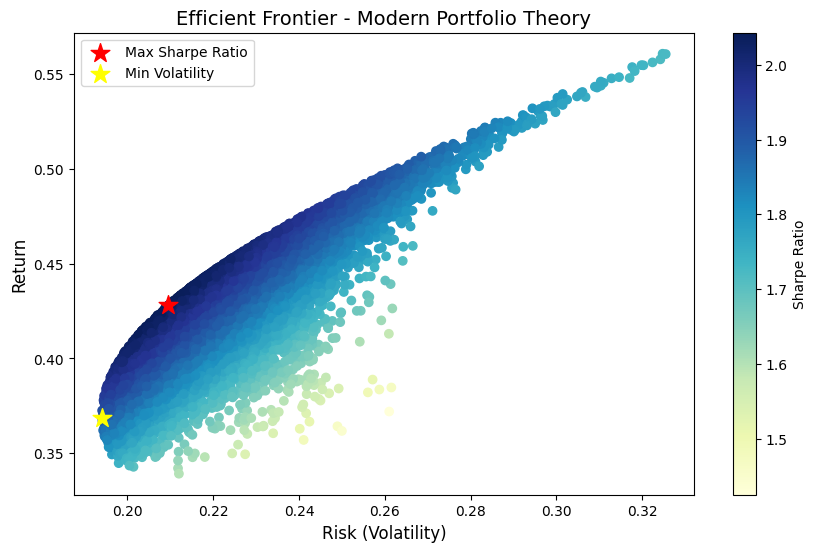

In [7]:
# Run the main script
if __name__ == "__main__":
    main()